# 다층 퍼세트론(MLP) : multi-layer perceptron

In [3]:
import numpy as np
from tensorflow.keras import datasets, utils, models, layers

### 데이터셋 전처리

In [5]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

NUM_CLASSES = 10

x_train = x_train.astype('float32') / 255.0     # [50000, 32, 32, 3] 넘파이 배열
x_test = x_test.astype('float32') / 255.0       # [10000, 32, 32, 3] 넘파이 배열

y_train = utils.to_categorical(y_train, NUM_CLASSES)    # 레이블을 원핫 인코딩
y_test = utils.to_categorical(y_test, NUM_CLASSES)      

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step


In [14]:
# 인덱스가 54인 이미지의 (12, 13) 위치에 있는 픽셀의 녹색 채널(1) 값
x_train[54, 12, 13, 1] 

0.36862746

### 모델 만들기

Sequential 모델을 이용하여 MLP 모델 정의

In [17]:
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(200, activation='relu'),
    layers.Dense(150, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

> Sequential모델이나 함수형 API를 사용해 신경망 구조를 정의할 수 있다.

* Sequential 모델 : 일렬로 층을 쌓은 네트워크를 빠르게 만들 때 사용하기 좋다. 
* 함수형 API : 신경망의 구조가 점점 복잡해짐에 따라 장기적으로 더 나은 선택이다. 심층 신경망의 설계를 자유롭게 가능하다. 

함수형 API 모델을 이용하여 MLP 모델 정의

In [20]:
input_layer = layers.Input(shape=(32, 32, 3))
x = layers.Flatten()(input_layer)
x = layers.Dense(units=200, activation= 'relu')(x)
x = layers.Dense(units=150, activation= 'relu')(x)
output_layer = layers.Dense(units=10, activation='softmax')(x)
model = models.Model(input_layer, output_layer)


옵티마이저와 손실함수 정의하기

In [22]:
from tensorflow.keras import optimizers
opt = optimizers.Adam(learning_rate = 0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

### 모델 훈련

In [23]:
model.fit(x_train,
        y_train,
        batch_size=32, # 훈련 스텝마다 네트워크에 전달될 샘플의 갯수 결정
        epochs = 10,    # 훈련 횟수 결정
        shuffle = True
        )

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2874 - loss: 1.9605
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3981 - loss: 1.6799
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4271 - loss: 1.6107
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4522 - loss: 1.5392
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4651 - loss: 1.5046
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4745 - loss: 1.4671
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4813 - loss: 1.4542
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4982 - loss: 1.4085
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5093 - loss: 1.3847
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5111 - loss: 1.3718


### 모델 평가

In [24]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.4971 - loss: 1.4294


[1.4303096532821655, 0.49230000376701355]

> 아주 기본적인 신경망을 사용해서 49%의 정확도를 달성한 것은 꽤 좋은 결과이다.

### predict 매세드를 사용해 테스트 세트에 대핸 예측 만들기

In [25]:
CLASSES = np.array(['airplane', 'automobile', 'bird','cat','deer','dog','frog','horse','ship','truck'])
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis= -1)]
actual_single = CLASSES[np.argmax(y_test, axis= -1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step


### MLP의 예측과 실제 레이블 출력하기

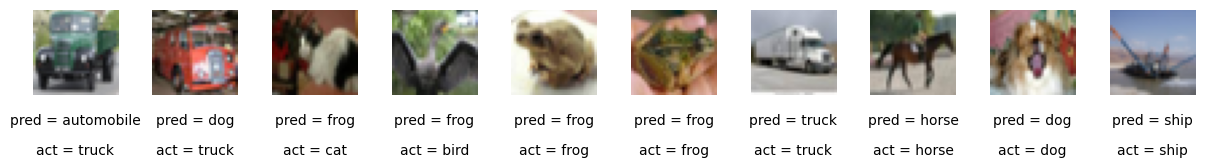

In [28]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show) # xtest에서 10개만 random하게 가져오기

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

----

# LSTM

### 1. 데이터 로드

In [34]:
import json


with open('./Data/full_format_recipes.json') as json_data:
    recipe_data = json.load(json_data)

filtered_data = [
    'Recipe for ' + x['title'] + '|' + ' '.join(x['directions'])
    for x in recipe_data 
    if 'title' in x
    and x['title'] is not None
    and 'directions' in x
    and x['directions'] is not None
]


### 2. 토큰화

In [35]:
import re
import string
import tensorflow as tf

# 모든 구두점 문자는 공백으로, 연속된 공백은 하나의 공백으로 
def pad_punctuation(s):
    s = re.sub(f"([{string.punctuation}])", r' \1', s)
    s = re.sub(' +', ' ', s)
    return s 

text_data = [pad_punctuation(x) for x in filtered_data]
text_ds = tf.data.Dataset.from_tensor_slices(text_data).batch(32).shuffle(1000) # 텐서플로 데이터셋으로 변환

# TextVectorization층 만들기 : 텍스트 벡터화 
vectorize_layer = layers.TextVectorization(
    standardize = 'lower',   # 텍스트를 소문자화
    max_tokens = 10000,      # 가장 자주 등장하는 10000개의 단어에 
    output_mode = "int",      # 정수를 부여
    output_sequence_length = 200 + 1, # 시퀀스 길이가 201개의 토근이 되도록 자르는 
)

vectorize_layer.adapt(text_ds) # TextVectorization층을 훈련 데이터에 적용
vocab = vectorize_layer.get_vocabulary() # 단어 토큰의 리스트를 저장

2024-07-02 12:13:28.454293: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
vocab

['',
 '[UNK]',
 '.',
 ',',
 'and',
 'to',
 'in',
 'the',
 'with',
 'a',
 'until',
 '1',
 'minutes',
 'of',
 'for',
 'add',
 'heat',
 'about',
 'over',
 'bowl',
 ';',
 '2',
 'salt',
 'into',
 'recipe',
 'on',
 'large',
 'medium',
 'mixture',
 ')',
 'pepper',
 'oil',
 'is',
 'water',
 'transfer',
 '3',
 'stir',
 'or',
 'pan',
 'remaining',
 'then',
 'oven',
 'cook',
 'stirring',
 'from',
 'cover',
 'butter',
 'skillet',
 'sugar',
 'at',
 'sauce',
 'cup',
 '/2',
 'baking',
 '5',
 'cool',
 '-inch',
 'be',
 'season',
 'it',
 'small',
 '4',
 'each',
 'let',
 'serve',
 'boil',
 'simmer',
 'place',
 'top',
 'remove',
 '/4',
 'heavy',
 'ahead',
 'are',
 'saucepan',
 'cut',
 'cream',
 'garlic',
 'chicken',
 'whisk',
 '10',
 'sprinkle',
 'using',
 'tablespoons',
 'occasionally',
 'bring',
 'just',
 'brown',
 'tender',
 'dough',
 'bake',
 'side',
 'spoon',
 'golden',
 'up',
 'pot',
 'through',
 'juice',
 'sheet',
 'if',
 'hours',
 'chill',
 'pour',
 'lemon',
 'together',
 'flour',
 'temperature',


### 3. 데이터셋 만들기

In [39]:
## 훈련 데이터 셋 생성
def prepare_inputs(text):
    text = tf.expand_dims(text, -1)
    tokenized_sentences = vectorize_layer(text)
    x = tokenized_sentences[:, :-1]
    y = tokenized_sentences[:, 1:]
    return x, y

train_ds  = text_ds.map(prepare_inputs)


2024-07-02 12:16:05.516161: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


[(<tf.Tensor: shape=(32, 200), dtype=int64, numpy=
  array([[  24,   14,   78, ...,    0,    0,    0],
         [  24,   14,  793, ...,    0,    0,    0],
         [  24,   14,  423, ...,    0,    0,    0],
         ...,
         [  24,   14, 6636, ...,    0,    0,    0],
         [  24,   14, 1420, ...,  104,  189,    4],
         [  24,   14,  155, ...,    0,    0,    0]])>,
  <tf.Tensor: shape=(32, 200), dtype=int64, numpy=
  array([[  14,   78,    8, ...,    0,    0,    0],
         [  14,  793, 5076, ...,    0,    0,    0],
         [  14,  423,  446, ...,    0,    0,    0],
         ...,
         [  14, 6636,  536, ...,    0,    0,    0],
         [  14, 1420, 2824, ...,  189,    4,   48],
         [  14,  155,    4, ...,    0,    0,    0]])>),
 (<tf.Tensor: shape=(32, 200), dtype=int64, numpy=
  array([[  24,   14, 3752, ...,    0,    0,    0],
         [  24,   14,   78, ...,   92,   37,  382],
         [  24,   14, 5600, ...,  144,  336,    5],
         ...,
         [  24,   

In [ ]:
from gc import callbacks


class TextGenerator(callbacks.Callback):
    def __init__(self, index_to_word, top_k = 10) :
        self.index_to_word = index_to_word

        ## 어휘사전의 단어에서 토큰으로 만든다.
        self.word_to_index = {
            word: index for index, word in enumerate(index_to_word)
        }

    # temperature 매개변수를 사용하여 확률을 업데이트 한다. 
    def sample_from(self, probs, temperature):
        probs = probs ** (1/ temperature)
        probs = probs / np.sum(probs)
        return np.random.choice(len(probs), p=probs), probs
    

    def generate(self, start_prompt, max_tokens, temprature):
        # 시작 프롬프트는 생성과정을 시작하기위해 모델에 제공하는 단어의 문자열
        start_tokens = [
            self.word_to_index.get(x, 1) for x in start_prompt.split()
        ]
        sample_token = None
        info = []

        # max_tokens길이가 되거나 중지토큰이 나올때까지 시퀀스를 생성한다. 
        while len(start_tokens) < max_tokens and sample_token != 0 :
            x = np.array([start_tokens])
            y = self.model.predict(x) # 다음에 나올 단어의 확률 출력
            sample_token, probs = self.sample_from(y[0][-1], temprature) # 이 확률은 smaple_from 메서드로 전달되어 temperature를 기반으로 다음단어 선택한다. 
            info.append({'prompt' : start_prompt, 'word_probs': probs})
            start_tokens.append(sample_token) # 반복을 위해 새로운 단어를 추가
            start_prompt = start_prompt + ' ' + self.index_to_word[sample_token]
        print(f"\n생성된 텍스트:\n{start_prompt}\n")
        return info
    
    def on_epoch_end(self, epoch, logs=None):
        self.generate("recipe for", max_tokens=100, temprature=1.0)

### 4. LSTM 훈련

In [41]:
inputs = layers.Input(shape=(None,), dtype="int32")
x = layers.Embedding(10000, 100)(inputs) # 10000개의 토큰, 100개의 차원
x = layers.LSTM(128, return_sequences=True)(x) # 은닉 차원 : 128, 은닉상태를 반환하도록 설정
outputs = layers.Dense(10000, activation= 'softmax')(x)
lstm = models.Model(inputs, outputs)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
lstm.compile("adam", loss_fn)
lstm.fit(train_ds, epochs=25)

Epoch 1/25


629/629 ━━━━━━━━━━━━━━━━━━━━ 312s 494ms/step - loss: 5.0005
Epoch 2/25
629/629 ━━━━━━━━━━━━━━━━━━━━ 322s 512ms/step - loss: 3.0586
Epoch 3/25
629/629 ━━━━━━━━━━━━━━━━━━━━ 309s 490ms/step - loss: 2.5278
Epoch 4/25
629/629 ━━━━━━━━━━━━━━━━━━━━ 331s 527ms/step - loss: 2.2748
Epoch 5/25
629/629 ━━━━━━━━━━━━━━━━━━━━ 322s 512ms/step - loss: 2.1008
Epoch 6/25
629/629 ━━━━━━━━━━━━━━━━━━━━ 318s 505ms/step - loss: 2.0015
Epoch 7/25
629/629 ━━━━━━━━━━━━━━━━━━━━ 323s 514ms/step - loss: 1.9164
Epoch 8/25
629/629 ━━━━━━━━━━━━━━━━━━━━ 317s 503ms/step - loss: 1.8634
Epoch 9/25
629/629 ━━━━━━━━━━━━━━━━━━━━ 298s 474ms/step - loss: 1.8137
Epoch 10/25
629/629 ━━━━━━━━━━━━━━━━━━━━ 293s 466ms/step - loss: 1.7681
Epoch 11/25
629/629 ━━━━━━━━━━━━━━━━━━━━ 291s 462ms/step - loss: 1.7400
Epoch 12/25
307/629 ━━━━━━━━━━━━━━━━━━━━ 2:37 488ms/step - loss: 1.7024